In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_curve, auc, fbeta_score
from sklearn.model_selection import train_test_split
from opt import RAdam
import os

os.environ["CUDA_VISIBLE_DEVICES"] = '1'

import matplotlib.pyplot as plt
#import matplotlib
#matplotlib.use('Agg')

import efficientnet.keras as efn
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Add, BatchNormalization, Input, Dense, MaxPooling2D, Conv2D, Flatten, Concatenate
from keras.layers.core import Activation, Layer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

import keras.backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.tensorflow_backend.set_session(tf.Session(config=config))


Using TensorFlow backend.


In [2]:
print("Importing Dataset")

data_dir = '/home/dados2T/Morfo/'
model_name = 'Images_MinMaxStandard'
images = np.load(os.path.join(data_dir, model_name + '.npy'))
target = np.load(os.path.join(data_dir,'Y_Engineered.npy'))
print(target.shape)
#pad = np.zeros((images.shape[0],images.shape[1],images.shape[2],1), dtype="float32")

X_train, X_test, Y_train, Y_test = train_test_split(images[:,:,:,7:10], target, test_size = 0.10, random_state = 7) # CHANNELS G,R,I
#X_train_F378, X_test_F378, Y_train, Y_test = train_test_split(np.concatenate([images[:,:,:,0:1],pad,pad], axis=-1), target, test_size = 0.10, random_state = 7)
#X_train_F395, X_test_F395, Y_train, Y_test = train_test_split(np.concatenate([images[:,:,:,1:2],pad,pad], axis=-1), target, test_size = 0.10, random_state = 7)
#X_train_F410, X_test_F410, Y_train, Y_test = train_test_split(np.concatenate([images[:,:,:,2:3],pad,pad], axis=-1), target, test_size = 0.10, random_state = 7)
#X_train_F430, X_test_F430, Y_train, Y_test = train_test_split(np.concatenate([images[:,:,:,3:4],pad,pad], axis=-1), target, test_size = 0.10, random_state = 7)
#X_train_F515, X_test_F515, Y_train, Y_test = train_test_split(np.concatenate([images[:,:,:,4:5],pad,pad], axis=-1), target, test_size = 0.10, random_state = 7)
#X_train_F660, X_test_F660, Y_train, Y_test = train_test_split(np.concatenate([images[:,:,:,5:6],pad,pad], axis=-1), target, test_size = 0.10, random_state = 7)
#X_train_F861, X_test_F861, Y_train, Y_test = train_test_split(np.concatenate([images[:,:,:,6:7],pad,pad], axis=-1), target, test_size = 0.10, random_state = 7)
#X_train_G, X_test_G, Y_train, Y_test = train_test_split(np.concatenate([images[:,:,:,7:8],pad,pad], axis=-1), target, test_size = 0.10, random_state = 7)
#X_train_I, X_test_I, Y_train, Y_test = train_test_split(np.concatenate([images[:,:,:,8:9],pad,pad], axis=-1), target, test_size = 0.10, random_state = 7)
#X_train_R, X_test_R, Y_train, Y_test = train_test_split(np.concatenate([images[:,:,:,9:10],pad,pad], axis=-1), target, test_size = 0.10, random_state = 7)
#X_train_U, X_test_U, Y_train, Y_test = train_test_split(np.concatenate([images[:,:,:,10:11],pad,pad], axis=-1), target, test_size = 0.10, random_state = 7)
#X_train_Z, X_test_Z, Y_train, Y_test = train_test_split(np.concatenate([images[:,:,:,11:],pad,pad], axis=-1), target, test_size = 0.10, random_state = 7)


del images
print(X_train.shape)
print(X_test.shape)


Importing Dataset
(8157, 22)
(7341, 320, 320, 3)
(816, 320, 320, 3)


In [32]:
print("Building Model")

inp = Input((320,320,3))
efn_arc = efn.EfficientNetB2(input_tensor = inp, weights='imagenet')

y_hat = Dense(target.shape[1] ,activation ="sigmoid")(efn_arc.layers[-2].output)

model = Model(efn_arc.input, y_hat)



Building Model









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [33]:
model.compile(loss = "categorical_crossentropy", optimizer=RAdam(), metrics = ['accuracy'])

In [34]:
print("Training Model")

model_name = model_name + "_test "+ '.hdf5'
batch_size = 20
check = ModelCheckpoint(model_name, monitor="val_loss", verbose=1, save_best_only=True)

gen = ImageDataGenerator(
		rotation_range=180,
		zoom_range=0.20,
		vertical_flip = True,
    horizontal_flip=True,
		fill_mode="nearest")


history = model.fit_generator(gen.flow(X_train, Y_train, batch_size = batch_size), epochs = 20,  
            verbose = 1, validation_data= (X_test, Y_test), callbacks=[check], 
            steps_per_epoch = X_train.shape[0] // batch_size)


Training Model
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
367/367 [==============================] - 423s 1s/step - loss: 15.9900 - acc: 0.1650 - val_loss: 15.0908 - val_acc: 0.2745

Epoch 00001: val_loss improved from inf to 15.09075, saving model to Images_MinMaxStandard_test .hdf5
Epoch 2/20
367/367 [==============================] - 357s 973ms/step - loss: 14.7448 - acc: 0.2059 - val_loss: 14.7069 - val_acc: 0.3591

Epoch 00002: val_loss improved from 15.09075 to 14.70692, saving model to Images_MinMaxStandard_test .hdf5
Epoch 3/20
367/367 [==============================] - 359s 977ms/step - loss: 14.4875 - acc: 0.1512 - val_loss: 14.5830 - val_acc: 0.1152

Epoch 00003: val_loss improved from 14.70692 to 14.58296, saving model to Images_MinMaxStandard_test .hdf5
Epoch 4/20
367/367 [==============================] - 357s 973ms/step - loss: 14.3928 - acc: 0.1519 - val_loss: 14.4099 - val_acc: 0.1434

Epoch 00004: val_los

In [3]:
from keras.models import load_model

model = load_model("Images_MinMaxStandard_test .hdf5", custom_objects= {"RAdam": RAdam()} )












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import numpy as np

def plot_quantized(model, model_name, X_train, Y_train, X_test, Y_test, classes):
    print("Training Statistics")
    pred = model.predict(X_train)

    fig = plt.figure(figsize = (40,20))
    fig.suptitle(model_name)
    
    for intervals in range(4):
    plt.subplot(5,6,1)
        for curves in range(1 + intervals,21,4):
        #plt.subplot(5,6,1)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(pred.shape[1]):
            fpr[i], tpr[i], thresh = roc_curve(Y_train[:, i], pred[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        lw = 2
        #colors = ['darkblue','darkorange']
        #classes = ['E','S']
        for i in range(pred.shape[1]):
            plt.plot(fpr[i], tpr[i],
                     lw=lw, label=f'{classes[i]} (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Training ROC')
        plt.legend(loc="lower right")


    print("Test Statistics")

    pred = model.predict(X_test)

    plt.subplot(2,3,2)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(pred.shape[1]):
        fpr[i], tpr[i], thresh = roc_curve(Y_test[:, i], pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    lw = 2
    #colors = ['darkblue','darkorange']
    #classes = ['E','S']
    for i in range(pred.shape[1]):
        plt.plot(fpr[i], tpr[i],
                 lw=lw, label=f'{classes[i]} (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Test ROC')
    plt.legend(loc="lower right")


    print("Best Model Statistics")

    model.load_weights(model_name + ".hdf5")
    pred = model.predict(X_test)

    plt.subplot(2,3,4)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(pred.shape[1]):
        fpr[i], tpr[i], thresh = roc_curve(Y_test[:, i], pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    lw = 2
    #colors = ['darkblue','darkorange']
    #classes = ['E','S']
    for i in range(pred.shape[1]):
        plt.plot(fpr[i], tpr[i],
                 lw=lw, label=f'{classes[i]} (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Best Model ROC')
    plt.legend(loc="lower right")


    print("Else Statistics")

    plt.subplot(2,3,3)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(2,3,6)

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')


    plt.subplot(2,3,5)

    # setup plot details
    colors = cycle(['navy', 'turquoise', 'cornflowerblue', 'teal'])

    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(pred.shape[1]):
        precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], pred[:, i])
        average_precision[i] = average_precision_score(Y_test[:, i], pred[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test[:, i].ravel(), pred[:, i].ravel())
    average_precision["micro"] = average_precision_score(Y_test[:, i], pred[:, i],
                                                         average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))

    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')
    l = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
    lines.append(l)
    labels.append('micro-average Precision-recall (area = {0:0.2f})'
                  ''.format(average_precision["micro"]))

    for i in range(pred.shape[1]):
        l, = plt.plot(recall[i], precision[i], lw=2)
        lines.append(l)
        labels.append('Precision-recall for {0} (area = {1:0.2f})'
                      ''.format(classes[i], average_precision[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Best Model Precision | Recall')
    plt.legend(lines, labels, loc="lower left", prop=dict(size=14))





    plt.savefig(f"{model_name}.png")

Training Statistics
Average precision score, micro-averaged over all classes: 0.33
Average precision score, micro-averaged over all classes: 0.24
Average precision score, micro-averaged over all classes: 0.77
Average precision score, micro-averaged over all classes: 0.21
Average precision score, micro-averaged over all classes: 0.15
Average precision score, micro-averaged over all classes: 0.38
Average precision score, micro-averaged over all classes: 0.26
Average precision score, micro-averaged over all classes: 0.39
Average precision score, micro-averaged over all classes: 0.21
Average precision score, micro-averaged over all classes: 0.25
Average precision score, micro-averaged over all classes: 0.97
Average precision score, micro-averaged over all classes: 0.87
Average precision score, micro-averaged over all classes: 0.42
Average precision score, micro-averaged over all classes: 0.68
Average precision score, micro-averaged over all classes: 0.91
Average precision score, micro-aver

/home/patrick/anaconda3/envs/DL/lib/python3.7/site-packages/ipykernel_launcher.py:287: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fb3d1402050>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


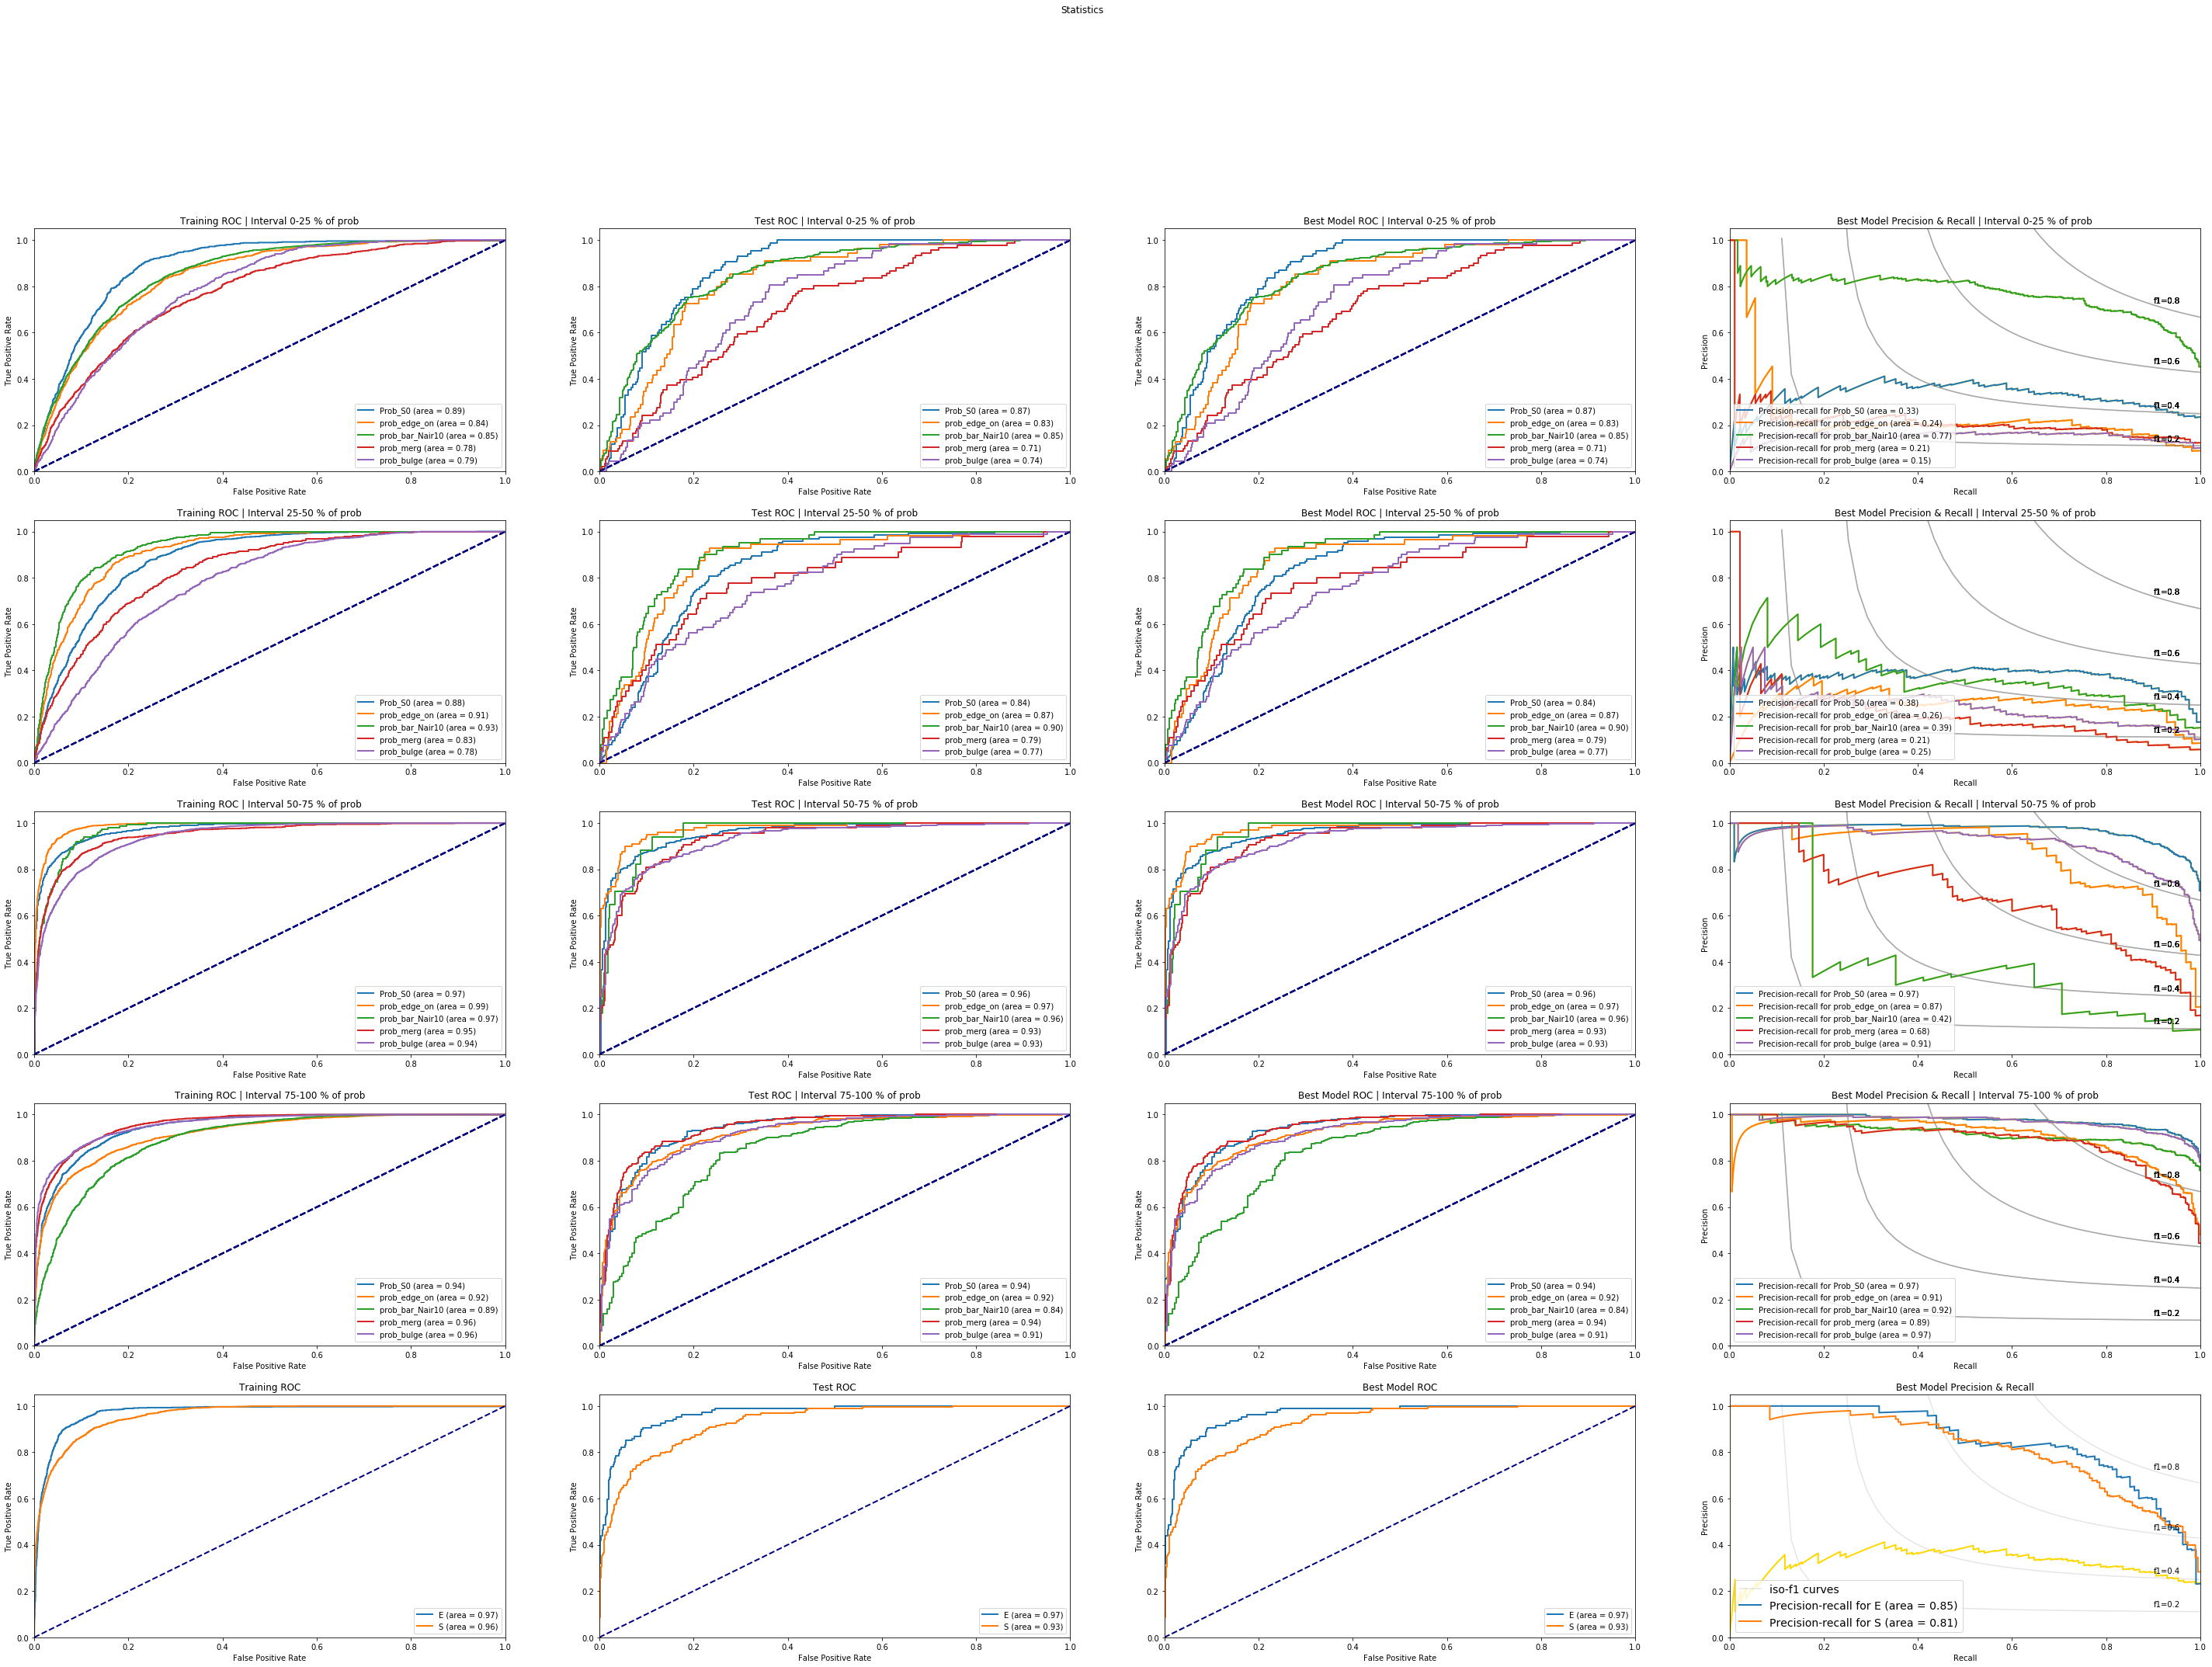

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import numpy as np



print("Training Statistics")
pred = model.predict(X_train)


fig = plt.figure(figsize = (50,40))
fig.suptitle("Statistics")

interval = ["0-25", "25-50", "50-75", "75-100"]
for intervals in range(4):
    plt.subplot(5,4, 1 + ( 4 * intervals ) )
    count = 0
    for curves in range(1 + intervals,21,4):
    #plt.subplot(5,6,1)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        
        fpr, tpr, thresh = roc_curve(Y_train[:, curves], pred[:, curves])
        roc_auc = auc(fpr, tpr)

        lw = 2
        #colors = ['darkblue','darkorange']
        classes = ['Prob_S0', "prob_edge_on", "prob_bar_Nair10", "prob_merg",'prob_bulge']
       
        plt.plot(fpr, tpr,
                 lw=lw, label=f'{classes[count]} (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Training ROC | Interval {interval[intervals]} % of prob')
        plt.legend(loc="lower right")
        count += 1
    

        
plt.subplot(5,4,17)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], thresh = roc_curve(Y_train[:, -(i)], pred[:, -i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 2
#colors = ['darkblue','darkorange']
classes = ['E','S']
for i in range(2):
    plt.plot(fpr[i], tpr[i],
             lw=lw, label=f'{classes[i]} (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Training ROC')
plt.legend(loc="lower right")


interval = ["0-25", "25-50", "50-75", "75-100"]
pred = model.predict(X_test)

for intervals in range(4):
    plt.subplot(5,4, 2 + ( 4 * intervals ) )
    count = 0
    for curves in range(1 + intervals,21,4):
    #plt.subplot(5,6,1)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        
        fpr, tpr, thresh = roc_curve(Y_test[:, curves], pred[:, curves])
        roc_auc = auc(fpr, tpr)

        lw = 2
        #colors = ['darkblue','darkorange']
        classes = ['Prob_S0', "prob_edge_on", "prob_bar_Nair10", "prob_merg",'prob_bulge']
       
        plt.plot(fpr, tpr,
                 lw=lw, label=f'{classes[count]} (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Test ROC | Interval {interval[intervals]} % of prob')
        plt.legend(loc="lower right")
        
        count += 1
    

        
plt.subplot(5,4,18)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], thresh = roc_curve(Y_test[:, -(i)], pred[:, -i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 2
#colors = ['darkblue','darkorange']
classes = ['E','S']
for i in range(2):
    plt.plot(fpr[i], tpr[i],
             lw=lw, label=f'{classes[i]} (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Test ROC')
plt.legend(loc="lower right")

#model = load_model("Images_MinMaxStandard_test .hdf5", custom_objects= {"RAdam": RAdam()} )
pred = model.predict(X_test)
interval = ["0-25", "25-50", "50-75", "75-100"]

for intervals in range(4):
    plt.subplot(5,4, 3 + ( 4 * intervals ) )
    count = 0
    for curves in range(1 + intervals,21,4):
    #plt.subplot(5,6,1)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        
        fpr, tpr, thresh = roc_curve(Y_test[:, curves], pred[:, curves])
        roc_auc = auc(fpr, tpr)

        lw = 2
        #colors = ['darkblue','darkorange']
        classes = ['Prob_S0', "prob_edge_on", "prob_bar_Nair10", "prob_merg",'prob_bulge']
       
        plt.plot(fpr, tpr,
                 lw=lw, label=f'{classes[count]} (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Best Model ROC | Interval {interval[intervals]} % of prob')
        plt.legend(loc="lower right")
        
        count += 1
    

        
plt.subplot(5,4,19)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], thresh = roc_curve(Y_test[:, -(i)], pred[:, -i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 2
#colors = ['darkblue','darkorange']
classes = ['E','S']
for i in range(2):
    plt.plot(fpr[i], tpr[i],
             lw=lw, label=f'{classes[i]} (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Best Model ROC')
plt.legend(loc="lower right")


interval = ["0-25", "25-50", "50-75", "75-100"]
classes = ['Prob_S0', "prob_edge_on", "prob_bar_Nair10", "prob_merg",'prob_bulge']
for intervals in range(4):
    plt.subplot(5,4, 4 + ( 4 * intervals ) )
    count = 0
    for curves in range(1 + intervals,21,4):
    #plt.subplot(5,6,1)
        precision = dict()
        recall = dict()
        average_precision = dict()
        
        precision[curves], recall[curves], _ = precision_recall_curve(Y_test[:, curves], pred[:, curves])
        average_precision[curves] = average_precision_score(Y_test[:, curves], pred[:, curves])

        # A "micro-average": quantifying score on all classes jointly
        precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test[:, curves].ravel(), pred[:, curves].ravel())
        average_precision["micro"] = average_precision_score(Y_test[:, curves], pred[:, curves],
                                                             average="micro")
        print('Average precision score, micro-averaged over all classes: {0:0.2f}'
              .format(average_precision["micro"]))

        f_scores = np.linspace(0.2, 0.8, num=4)
        lines = []
        labels = []
        for f_score in f_scores:
            x = np.linspace(0.01, 1)
            y = f_score * x / (2 * x - f_score)
            l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
            plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

        lines.append(l)
        labels.append('iso-f1 curves')
        l = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
        lines.append(l)
        labels.append('micro-average Precision-recall (area = {0:0.2f})'
                      ''.format(average_precision["micro"]))

       
        l, = plt.plot(recall[curves], precision[curves], lw=2, label = 'Precision-recall for {0} (area = {1:0.2f})'
                      ''.format(classes[count], average_precision[curves]))
        lines.append(l)
        #labels.append('Precision-recall for {0} (area = {1:0.2f})'
        #              ''.format(classes[(curves - intervals) % 5], average_precision[curves]))

        fig = plt.gcf()
        fig.subplots_adjust(bottom=0.25)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Best Model Precision & Recall | Interval {interval[intervals]} % of prob')
        #plt.legend(lines, labels, loc="lower left", prop=dict(size=14))
        plt.legend( loc = "lower left")
        #classes = ['Prob_s0', "prob_t", "prob_q", "prob_g",'S']
        count += 1
       
    

        
plt.subplot(5,4,20)

classes = ['E','S']
precision = dict()
recall = dict()
average_precision = dict()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, -i], pred[:, -i])
    average_precision[i] = average_precision_score(Y_test[:, -i], pred[:, -i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test[:, i].ravel(), pred[:, i].ravel())
average_precision["micro"] = average_precision_score(Y_test[:, i], pred[:, i],
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i in range(2):
    l, = plt.plot(recall[i], precision[i], lw=2)
    lines.append(l)
    labels.append('Precision-recall for {0} (area = {1:0.2f})'
                  ''.format(classes[-i], average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Best Model Precision & Recall')
plt.legend(lines, labels, loc="lower left", prop=dict(size=14))

plt.savefig("test.png")

plt.show()